In [3]:
import pandas as pd
import os

In [4]:
# Upload dataset

stations = pd.read_csv('stations.csv')
routes= pd.read_csv('train_routes.csv')

In [5]:
stations.head()

,code,lat,long,name
0,AAP,51.598290,-0.120140,Alexandra Palace
1,AAT,57.609813,-4.914217,Achanalt
2,ABA,51.715057,-3.443099,Aberdare
3,ABC,58.388326,-3.705268,Altnabreac
4,ABD,57.143048,-2.097480,Aberdeen


In [6]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    2581 non-null   object 
 1   lat     2581 non-null   float64
 2   long    2581 non-null   float64
 3   name    2581 non-null   object 
dtypes: float64(2), object(2)
memory usage: 80.8+ KB


In [7]:
tot_stations = stations['code'].count()

print('There are '+ str(tot_stations) +  ' stations in the UK.')

There are 2581 stations in the UK.


In [8]:
# The "northen, southern, eastern and western most stations"

max_lat= stations['lat'].max()
min_lat= stations['lat'].min()
max_long= stations['long'].max()
min_long= stations['long'].min()

In [9]:
max_lat_stn = stations[stations['lat'] == max_lat]['name'].values.tolist()
min_lat_stn = stations[stations['lat'] == min_lat]['name'].values.tolist()
max_long_stn = stations[stations['long'] == max_long]['name'].values.tolist()
min_long_stn = stations[stations['long'] == min_long]['name'].values.tolist()

In [10]:
print(f"The northenmost station with {max_lat} latitude is: {', '.join(max_lat_stn)}")
print(f"The southernmost station with {min_lat} latitude is: {', '.join(min_lat_stn)}")
print(f"The westernmost station with {max_long} longitude is: {', '.join(max_long_stn)}")
print(f"The easternmost station with {min_long} longitude is: {', '.join(min_long_stn)}")

The northenmost station with 58.58998665 latitude is: Thurso
The southernmost station with 50.12168229 latitude is: Penzance
The westernmost station with 1.749727847 longitude is: Lowestoft
The easternmost station with -5.839071397 longitude is: Arisaig


In [11]:
import matplotlib.pyplot as plt

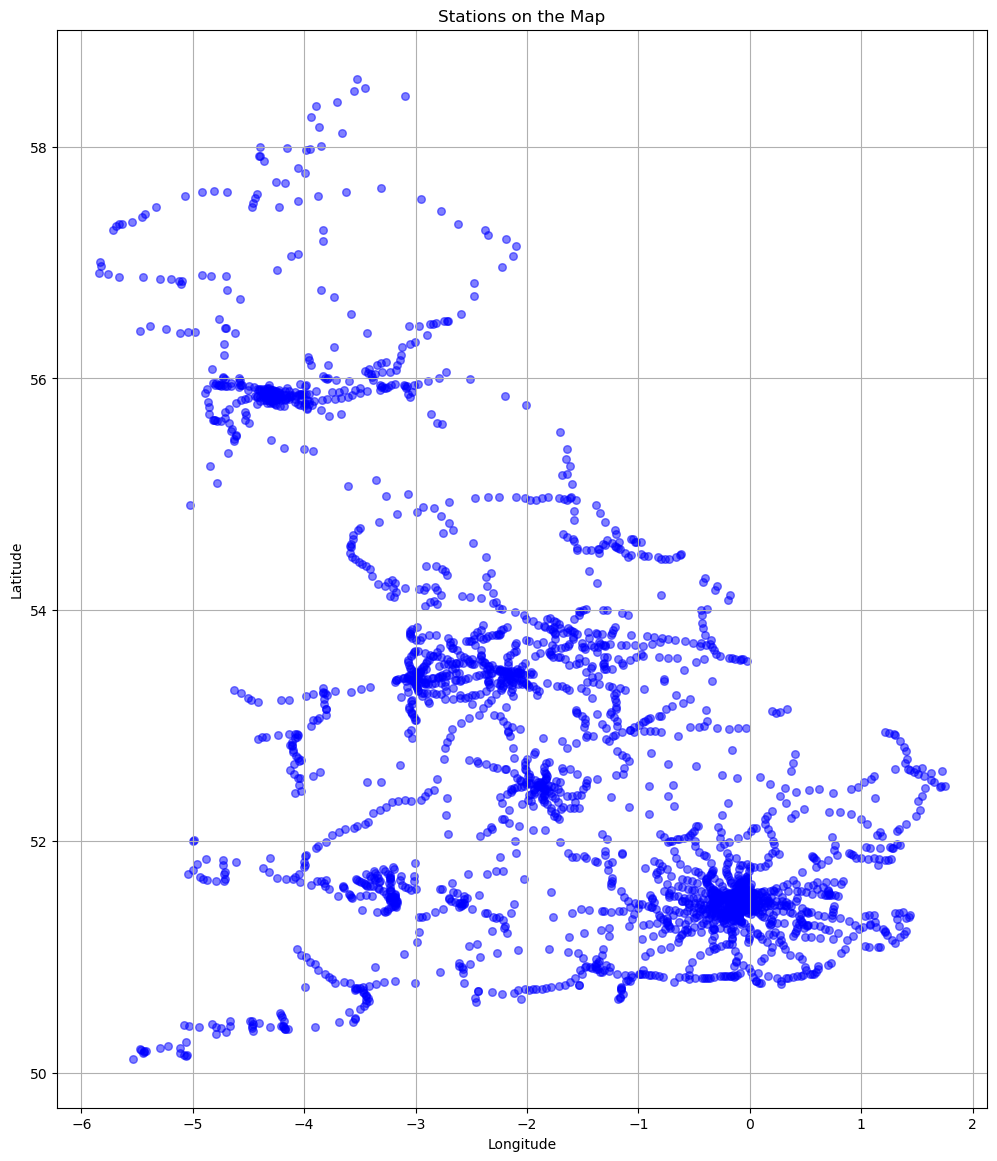

In [17]:
# create a graph to display all stations

plt.figure(figsize=(12, 14))
plt.scatter(stations['long'], stations['lat'], marker='o', color='blue', s=30, alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Stations on the Map')

plt.grid(True)
plt.show()

In [22]:
# Which one is the busiest station of the list?

routes.head()

,dep_stn,stop_1,stop_2,stop_3,stop_4,stop_5,stop_6,stop_7,stop_8,stop_9,...,stop_33,stop_34,stop_35,stop_36,stop_37,stop_38,stop_39,stop_40,train_route,stn_connected
0,London Kings Cross,Finsbury Park,Harringay,Hornsey,Alexandra Palace,Bowes Park,Palmers Green,Winchmore Hill,Grange Park,Enfield Chase,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"London Kings Cross, Finsbury Park, Harringay, ...",17
1,Stevenage,Watton-at-Stone,Hertford North,Bayford,Cuffley,Crews Hill,Gordon Hill,Enfield Chase,Grange Park,Winchmore Hill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Stevenage, Watton-at-Stone, Hertford North, Ba...",17
2,London Kings Cross,Finsbury Park,Harringay,Hornsey,Alexandra Palace,New Southgate,Oakleigh Park,New Barnet,Hadley Wood,Potters Bar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"London Kings Cross, Finsbury Park, Harringay, ...",14
3,Welwyn Garden City,Hatfield (Herts),Welham Green,Brookmans Park,Potters Bar,Hadley Wood,New Barnet,Oakleigh Park,New Southgate,Alexandra Palace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Welwyn Garden City, Hatfield (Herts), Welham G...",14
4,Pontypridd,Abercynon,Penrhiwceiber,Mountain Ash,Fernhill,Cwmbach,Aberdare,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Pontypridd, Abercynon, Penrhiwceiber, Mountain...",7


In [120]:
import pandas as pd


c_1 = 'dep_stn'  # First column name to look into
c_2 = 'stop_40'  # Last column name to look into

selected_columns = routes.loc[:, c_1:c_2]

station_counts = selected_columns.stack().value_counts()

train_frequency = pd.DataFrame({'station': station_counts.index, 'train_freq': station_counts.values})

train_frequency.head()


,station,train_freq
0,Clapham Junction,262
1,Manchester Piccadilly,240
2,Leeds,237
3,Cardiff Central,233
4,Birmingham New Street,221


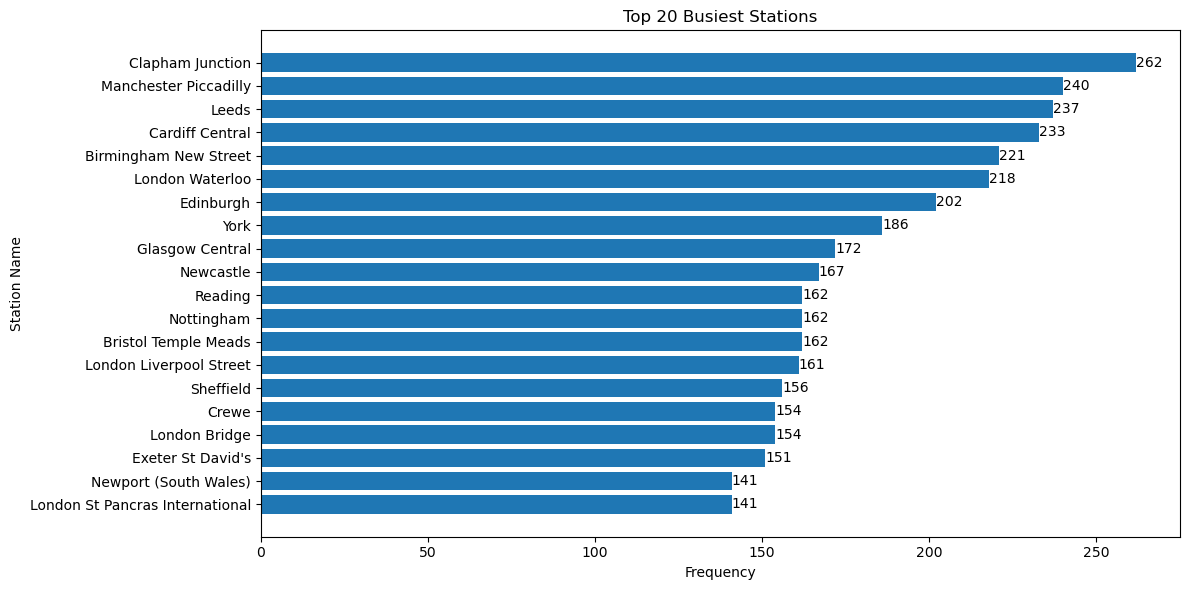

In [114]:
top_20_stations = station_df.sort_values(by='Frequency', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_20_stations['Station Name'], top_20_stations['Frequency'])


plt.xlabel('Frequency')
plt.ylabel('Station Name')
plt.title('Top 20 Busiest Stations')

for i, freq in enumerate(top_20_stations['Frequency']):
    plt.text(freq, i, str(freq), ha='left', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis
plt.tight_layout()
plt.show()

In [124]:
import plotly.express as px

In [125]:
stations.head()


,code,lat,long,name
0,AAP,51.598290,-0.120140,Alexandra Palace
1,AAT,57.609813,-4.914217,Achanalt
2,ABA,51.715057,-3.443099,Aberdare
3,ABC,58.388326,-3.705268,Altnabreac
4,ABD,57.143048,-2.097480,Aberdeen


In [133]:
fig = px.scatter_geo(
    stations,
    lat='lat',
    lon='long',
    hover_name='name',
    scope='europe',
    projection='natural earth'
)

# Customize the map
fig.update_geos(
    resolution=50, 
    showcoastlines=True,
    coastlinecolor="RebeccaPurple",
    showland=True,
    landcolor="LightGreen",
    showocean=False,  
    showcountries=True,  
    countrycolor="gray",
    showsubunits=False, 
)

# map title
fig.update_layout(
    title_text='UK Stations Map',  
    geo=dict(
        showcoastlines=True,
        coastlinecolor="RebeccaPurple",
    )
)

# Show the map
fig.show()
